In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/Apple.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date       Open       High        Low      Close  Adj Close  \
0  2018-12-12  42.599998  42.980000  42.255001  42.275002  40.576008   
1  2018-12-13  42.622501  43.142502  42.387501  42.737499  41.019917   
2  2018-12-14  42.250000  42.270000  41.320000  41.369999  39.707371   
3  2018-12-17  41.362499  42.087502  40.682499  40.985001  39.337845   
4  2018-12-18  41.345001  41.882500  41.097500  41.517502  39.848946   

      Volume  
0  142510800  
1  127594400  
2  162814800  
3  177151600  
4  135366000  


In [25]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.001, 'gamma': 'scale'}
Best score: 2.9243551922959092


In [27]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([182.26863667, 182.44803131, 183.9237861 , 184.21917995,
       183.6501873 , 183.18168398, 184.25605128, 184.56163467,
       184.84173975, 185.02810163, 185.7729827 , 185.84806829,
       187.11256548, 187.02204072, 186.8364091 , 186.5743057 ,
       186.7588993 , 185.81296331, 185.49356648, 186.47262557,
       186.2961436 , 186.29250465, 187.09106267, 187.0924624 ,
       187.04641989, 187.21591923, 187.16636908, 187.16076312,
       187.10737092, 187.21016354, 187.17588087, 187.2107798 ,
       187.21538784, 187.2065346 , 187.18381863, 186.67738627,
       184.45539833, 181.47923892, 179.06009197, 179.64249429,
       179.48497759, 177.55056966, 178.53774835, 178.34632756,
       177.47562161, 176.49787813, 174.13213263, 175.15490637,
       176.66081784, 180.1771544 , 179.79034178, 178.04318031,
       179.34411465, 182.82079077, 184.72903884, 185.40542212,
       185.78191213, 185.80854284, 185.26955297, 177.16491536,
       179.03331017, 179.08684752, 178.93488379, 176.29

In [28]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[193.179993]])

In [29]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([186.88275484]),
 array([184.15279407]),
 array([182.27074398]),
 array([180.78237465]),
 array([179.51338376]),
 array([178.3768395]),
 array([177.32231212]),
 array([176.31731107]),
 array([175.33915462]),
 array([174.37096439]),
 array([173.39953657]),
 array([172.41416627]),
 array([171.40600501]),
 array([170.36774383]),
 array([169.29351023]),
 array([168.17890973]),
 array([167.0211592]),
 array([165.81926035]),
 array([164.57415771]),
 array([163.28882146]),
 array([161.96819873]),
 array([160.61899413]),
 array([159.24927009]),
 array([157.86789743]),
 array([156.48392299]),
 array([155.10594294]),
 array([153.74156815]),
 array([152.39704382]),
 array([151.07704877]),
 array([149.78466354])]

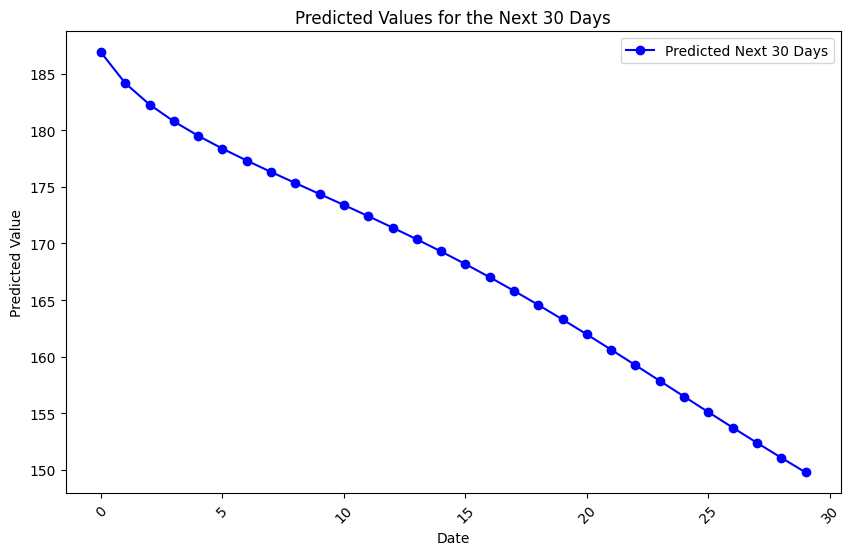

In [30]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [31]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    3.468348
dtype: float64
Testing MAPE: 0.013905089931110927
Testing MAE: 2.6195840387005136


In [33]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    3.468348
dtype: float64
Testing MAPE: 0.013905089931110927
Testing MAE: 2.6195840387005136


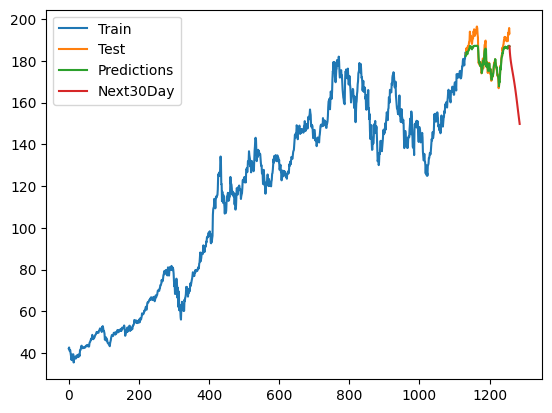

In [34]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()